In [1]:
import numpy as np
from matplotlib import rc
import matplotlib.pyplot as plt

In [3]:
# Code mainly copied from : https://scipython.com/blog/cobweb-plots/

# Use LaTeX throughout the figure for consistency
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 16})
rc('text', usetex=True)
# Figure dpi
dpi = 72

In [137]:
def plot_cobweb(f, lmda, x_ini, mu=1/3, nmax=40, x_range=(0, 1)):
    """Make a cobweb plot.

    Plot y = f(x; r) and y = x for 0 <= x <= 1, and illustrate the behaviour of
    iterating x = f(x) starting at x = x0. r is a parameter to the function.

    """
    x = np.linspace(x_range[0], x_range[1], 500)
    fig = plt.figure(figsize=(10, 8), dpi=dpi)
    ax = fig.add_subplot(111)

    # Plot y = f(x) and y = x
    ax.plot(x, f(x, lmda, mu), c='red', lw=2)
    ax.plot(x, x, c='grey', lw=2)
    
    # Plot x-y graph
    ax.hlines(0, x_range[0], x_range[1], color='lightgrey')
    ax.vlines(0, x_range[0], x_range[1], color='lightgrey')

    # Iterate x = f(x) for nmax steps, starting at (x0, 0).
    for x0 in x_ini:
        px, py = np.empty((2, nmax+1, 2))
        px[0], py[0] = x0, 0
        for n in range(1, nmax, 2):
            px[n] = px[n-1]
            py[n] = f(px[n-1], lmda, mu)
            px[n+1] = py[n]
            py[n+1] = py[n]

        # Plot the path traced out by the iteration.
        ax.plot(px, py, c='b', alpha=0.7)

    # Annotate and tidy the plot.
    ax.set_xlabel('$x$')

In [138]:
def iterative_map(x, lmda, mu=1/3):
    return lmda * x + mu

## Q1, b)
For $\lambda=\frac{1}{2}$, $\mu=1/3$

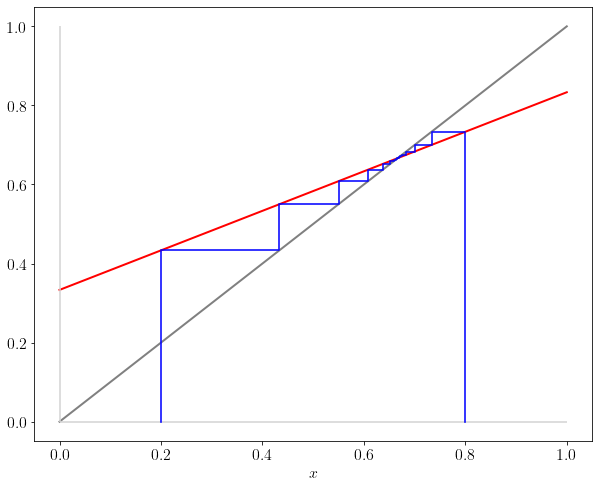

In [139]:
lmda = 1/2
plot_cobweb(iterative_map, lmda, [0.2, 0.8])

$\lambda=2$, $\mu=2$

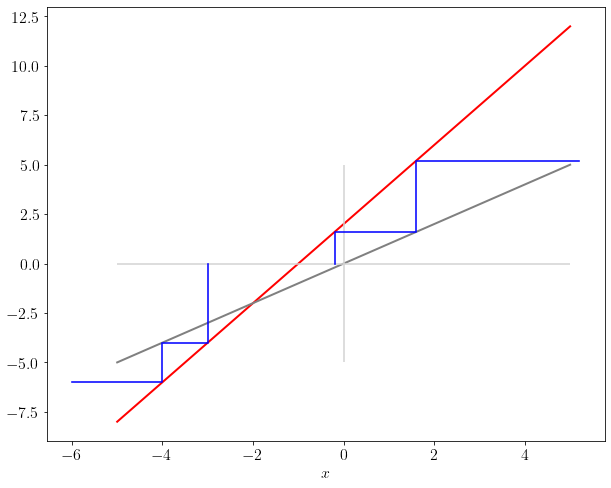

In [156]:
lmda = 2
plot_cobweb(iterative_map, lmda, [-0.2, -3], mu=2, nmax=4, x_range=(-5, 5))

$\lambda=-1$, $\mu=1$

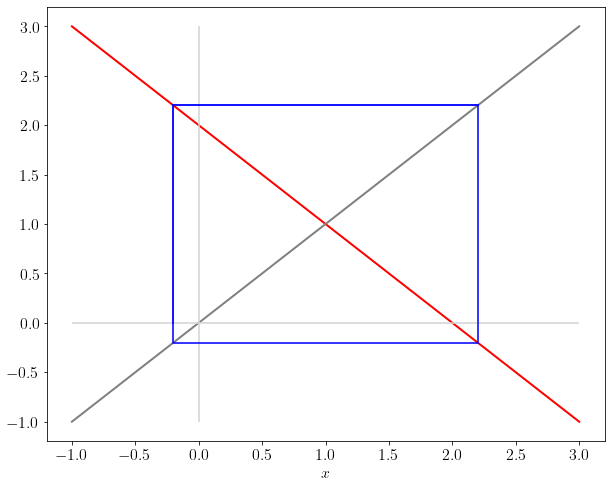

In [164]:
lmda = -1
plot_cobweb(iterative_map, lmda, [-0.2], mu=2, nmax=6, x_range=(-1, 3))

## Q 1 d)

$\lambda=1$, $\mu=1$

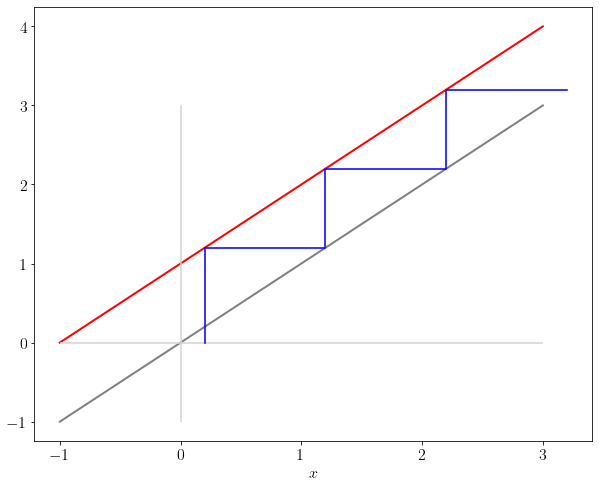

In [146]:
lmda = 1
plot_cobweb(iterative_map, lmda, [.2], mu=1, nmax=6, x_range=(-1, 3))

$\lambda=1$, $\mu=-1$

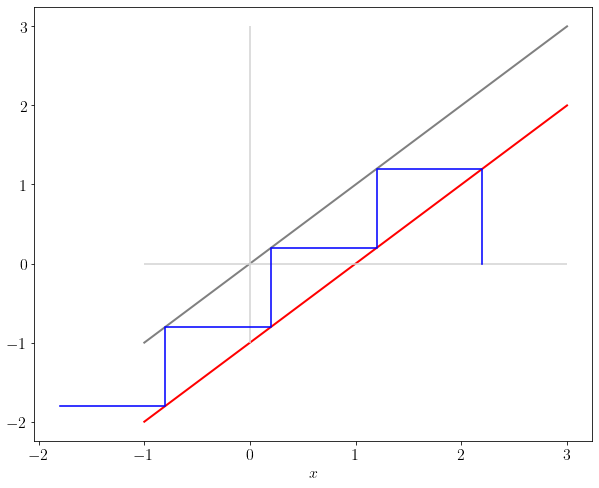

In [152]:
lmda = 1
plot_cobweb(iterative_map, lmda, [2.2], mu=-1, nmax=8, x_range=(-1, 3))

$\lambda=1$, $\mu=0$

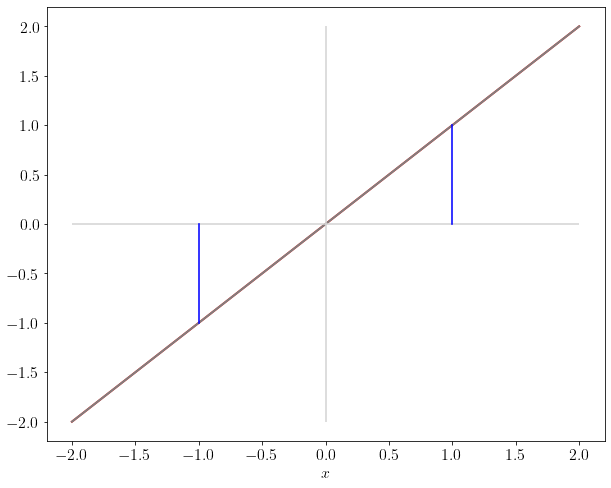

In [154]:
lmda = 1
plot_cobweb(iterative_map, lmda, [-1, 1], mu=0, nmax=8, x_range=(-2, 2))